<a href="https://colab.research.google.com/github/Abhinavtej/Pongal-Assignments/blob/main/RL_Pongal_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Implement Upper-Confience bound algorithm (UCB) in Multi Arm Banding Problem to optimize player rewards in a basic game simulation with Python Program.
The game scenario involves a player choosing between different "actions" (like doors, treasures, or paths), each with a hidden reward probability.
The UCB algorithm must help the game adapt dynamically to maximize the player's experience.
'''
import numpy as np

class UCB:
    def __init__(self, num_actions):
        self.num_actions = num_actions
        self.action_counts = np.zeros(num_actions)
        self.Q_values = np.zeros(num_actions)
        self.total_counts = 0

    def select_action(self):
        if 0 in self.action_counts:
            return np.argmin(self.action_counts)

        ucb_values = self.Q_values + np.sqrt(2 * np.log(self.total_counts) / self.action_counts)
        return np.argmax(ucb_values)

    def update(self, action, reward):
        self.total_counts += 1
        self.action_counts[action] += 1
        self.Q_values[action] += (reward - self.Q_values[action]) / self.action_counts[action]

num_actions = 5
ucb_agent = UCB(num_actions)

total_rounds = 1000

for round in range(total_rounds):
    action = ucb_agent.select_action()
    reward = np.random.binomial(1, 0.8) if action == 2 else np.random.binomial(1, 0.5)
    ucb_agent.update(action, reward)

print("Estimated rewards for each action:", ucb_agent.Q_values)
print("Action counts:", ucb_agent.action_counts)

Estimated rewards for each action: [0.5        0.54878049 0.82025678 0.56179775 0.48387097]
Action counts: [ 66.  82. 701.  89.  62.]


In [2]:
'''
Imagine an IoT-based smart home system that dynamically optimizes energy usage across multiple devices (e.g., air conditioner, heater, and lights).
Each device has a varying energy consumption efficiency based on real-time environmental factors like temperature or occupancy.
Design an UCB algorithm is used to determine which device settings (e.g., energy modes) should be prioritized to maximize energy efficiency
and implement the algorithm in Python
'''

import numpy as np

class IoTUCB:
    def __init__(self, num_devices):
        self.num_devices = num_devices
        self.device_counts = np.zeros(num_devices)
        self.energy_efficiencies = np.random.uniform(0.5, 1, num_devices)
        self.Q_values = np.zeros(num_devices)
        self.total_counts = 0

    def select_device(self):
        if 0 in self.device_counts:
            return np.argmin(self.device_counts)

        ucb_values = self.Q_values + np.sqrt(2 * np.log(self.total_counts) / self.device_counts)
        return np.argmax(ucb_values)

    def update(self, device_index, energy_consumed):
        self.total_counts += 1
        self.device_counts[device_index] += 1
        self.Q_values[device_index] += (self.energy_efficiencies[device_index] - energy_consumed / 10) / self.device_counts[device_index]

num_devices = 3
iot_ucb_agent = IoTUCB(num_devices)

total_rounds = 1000

for round in range(total_rounds):
    device_index = iot_ucb_agent.select_device()
    energy_consumed = np.random.uniform(1, 5)
    iot_ucb_agent.update(device_index, energy_consumed)

print("Optimized Q-values (efficiencies) for each device:", iot_ucb_agent.Q_values)
print("Device selection counts:", iot_ucb_agent.device_counts)

Optimized Q-values (efficiencies) for each device: [0.55098533 0.84142618 3.46518708]
Device selection counts: [  3.   4. 993.]


Predicted optimal move: 2


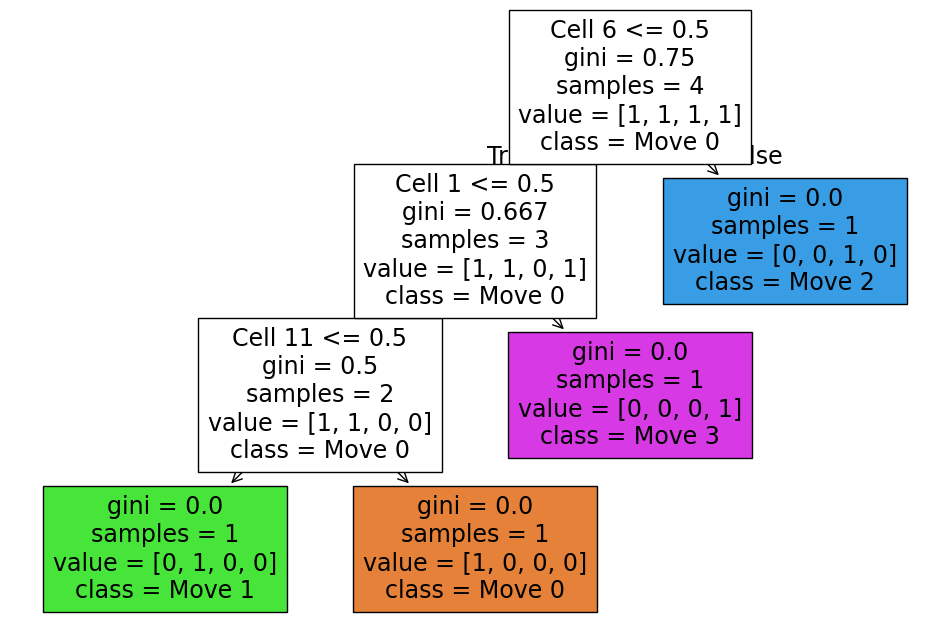

In [3]:
'''
Develop a Chess-like game using PAC(Probably approximately correct ) algorithm where the Problem set-up is as follows:
  Problem Setup
    i) Game Environment: Simplify chess to a smaller grid with basic pieces (like pawns and a king).
    ii) PAC Learning: Train a model to approximate a move policy that is "probably approximately correct" (i.e., likely correct within some error bounds).
    iii) Implementation Goals: Use supervised learning to train a model with a dataset of board states and corresponding optimal moves.

  Implementation:
    1. The chess-like game will have a simplified 4x4 board with only a king and a few pawns.
    2. PAC learning will train a simple classifier (e.g., decision tree) to predict moves.
'''

from sklearn.tree import DecisionTreeClassifier
import numpy as np

X_train = np.array([
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
])

y_train = np.array([1, 2, 0, 3])

pac_model = DecisionTreeClassifier()
pac_model.fit(X_train, y_train)

new_board_state = np.array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]])
predicted_move = pac_model.predict(new_board_state)

print("Predicted optimal move:", predicted_move[0])

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(pac_model, feature_names=[f"Cell {i}" for i in range(16)], class_names=["Move 0", "Move 1", "Move 2", "Move 3"], filled=True)
plt.show()
